<h2>Численные методы - Вариант 2</h2>

In [1]:
var("x", domain = 'real')

x

In [2]:
y(x) = (ln(x-2) + 1) / (x - 2)
show(y)

x |--> (log(x - 2) + 1)/(x - 2)

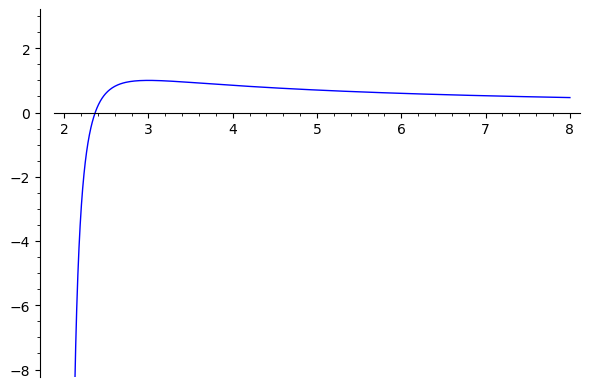

In [3]:
g = plot(y, (x,2,8), ymin=-8, ymax=3)
show(g)

In [4]:
import numpy as np

def rectangle_method(f, a, b, STEP, graph = False):
    area = 0
    
    pl = Graphics()
    
    if graph:
        
        x1 = a;
        x2 = a + STEP;
        
        for i in np.arange(0.0, (b-a) / STEP):
            
            pl += polygon2d([[x1, 0], 
                             [x2, 0], 
                             [x2, f(x = a + STEP * (i + .5))], 
                             [x1, f(x = a + STEP * (i + .5))], 
                             [x1, 0]], 
                             rgbcolor=(7/8,1/4,3/4), fill=False, thickness=1.5, alpha = 0.5)
            
            area += f(x = a + STEP * (i + .5))
            x1 = x2
            x2 += STEP
    else:
        for i in np.arange(0.0, (b-a) / STEP):
            area += f(x = a + STEP * (i + .5))
            
    return STEP * area, plot(f, xmin=a, xmax=b, legend_label = STEP * area) + pl

In [5]:
import numpy as np

def trapezoid_method(f, a, b, STEP, graph = False):
    area = 0
    
    pl = Graphics() 
    
    if graph:
        
        x1 = a;
        x2 = a + STEP;
        
        for i in np.arange(0.0, (b-a)/STEP):
            
            pl += polygon2d([[x1, 0], 
                             [x2, 0], 
                             [x2, f(x = x2)], 
                             [x1, f(x = x1)], 
                             [x1, 0]], 
                             rgbcolor=(7/8,1/4,3/4), fill=False, thickness=1.5, alpha = 0.5)

            area += (.5 * STEP * (f(x = x1) + f(x = x2)))
            x1 = x2
            x2 += STEP

    else:
        x1 = a;
        x2 = a + STEP;
        
        for i in np.arange(0.0, (b-a)/STEP):
            area += (.5 * STEP * (f(x = x1) + f(x = x2)))
            x1 = x2
            x2 += STEP
            
    return area, plot(f, xmin=a, xmax=b, legend_label = area) + pl

In [6]:
@interact
def _(A = (2, 4, 0.001), B = (3, 8, 0.001), STEP = (0.0005, 0.1, 0.0005)):
    if A == B:
        show(LatexExpr(f"\\int_A^B y(x)dx = "), y.integral(x, A, B).n())
        graphics_array([[plot(y, (x,2,8), ymin=-8, ymax=3, legend_label = '0'), 
                         plot(y, (x,2,8), ymin=-8, ymax=3, legend_label = '0')]]).show(figsize=14, aspect_ratio='automatic', frame=True, axes=False)
        return
    area_rec_met, pl1 = rectangle_method(y, A, B, STEP, True)
    area_trap_met, pl2 = trapezoid_method(y, A, B, STEP, True)
    show(LatexExpr(f"\\int_A^B y(x)dx = "), y.integral(x, A, B).n())
    graphics_array([[pl1, pl2]]).show(figsize=14, aspect_ratio='automatic', frame=True, axes=False)

Interactive function <function _ at 0x6fff4c9ebc20> with 3 widgets
  A: FloatSlider(value=3.0, description='A'…

<h2>НОД - Вариант 2</h2>


In [7]:
R.<x> = QQ[]

In [8]:
f = x^4 - 4*x^3 + 7*x^2 - 5*x + 1
g = x^5 - x^4 - x^3 + x^2 + 5*x - 5
show(LatexExpr("f = ") + f)
show(LatexExpr("g = ") + g)

f = x^4 - 4*x^3 + 7*x^2 - 5*x + 1

g = x^5 - x^4 - x^3 + x^2 + 5*x - 5

In [9]:
def extended_gcd(a, b):
    if a == 0: 
        return b, 0, 1
    else:
        d, x1, y1 = extended_gcd(b%a, a)
        return (d, y1 - (b // a) * x1, x1)

__НОД, полученный расширенным алгоритмом Евклида:__

In [17]:
r, u, v = extended_gcd(f, g)
show(LatexExpr("НОД(f, g) = "), r / r.coefficients()[1])

НОД(f, g) =  x - 1

__НОД, полученный встроенным методом gcd:__

In [11]:
show(LatexExpr("НОД(f, g) = "), f.gcd(g))

НОД(f, g) =  x - 1

__Результаты отличаются на константу__

In [12]:
show(r / f.gcd(g))

1936/441

__Представление НОД в виде тождества Безу:__ $f*u + g*v = НОД(f, g)$:

In [13]:
show( LatexExpr(f"({f})*({u}) +"))
show( LatexExpr(f"+ ({g})*({v}) = {r}"))

(x^4 - 4*x^3 + 7*x^2 - 5*x + 1)*(-16/21*x^3 - 128/441*x^2 + 656/441*x + 1264/441) +

+ (x^5 - x^4 - x^3 + x^2 + 5*x - 5)*(16/21*x^2 - 880/441*x + 640/441) = 1936/441*x - 1936/441

In [6]:
R.<x> = QQ[]
f = x^2-2
g = x+1
f%g

-1